# AD loci "explained" by xQTL

**Author:** Jenny Empawi

## Motivation

Answer the question: How many AD risk loci overlap (via fine-mapping credible sets) and/or formally colocalize (via colocalization confident sets) with various xQTL modalities and contexts? This analysis aims to quantify the extent to which Alzheimer's disease risk loci can be 'explained' through molecular quantitative trait loci across multiple biological contexts and data types.

## Methods Overview

- Leverage AD GWAS fine-mapping and xQTL fine-mapping discussed in previous sections
- Perform AD GWAS fine-mapping with multi-trait xQTL data genome-wide
- Summarize results by GWAS studies to identify the proportion of AD loci explained

## Implementation

### Overlap Analysis

Create a bar plot showing overlap between AD loci and multiple xQTL data types, quantifying explained loci and distinguishing between detectable and mappable categories. This analysis will highlight overlap types with illustrative cartoons and bar plots to visualize the intersection patterns between AD risk variants and molecular QTL signals across different experimental contexts.

### Gene Involvement Evidence

Generate a stacked bar plot for each AD locus showing evidence of multiple gene involvement, defined by overlap between 95% GWAS credible sets and 95% xQTL credible sets. This section will summarize xQTL-based gene targets per AD locus, including both cis and trans targets, providing comprehensive insights into the molecular mechanisms potentially underlying AD risk at each genomic region.

#### Summarize single context results

In [1]:
library(data.table)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#gwas <- fread('analysis_result/AD_GWAS_finemapping/export/context_specific/data/109_blocks_top_loci.csv.gz') ## From Ruixi on Mar19, 2025
gwas <- fread('/Staging/variant_gene_summary/AD_xQTL_integration_summary/AD_GWAS_finemapping_109_blocks_top_loci_unified_any0.8ANDmin0.5.csv.gz')
coverage <- "cs_coverage_0.95_min_corr"
gwas_95 <- gwas %>%
  mutate(!!coverage := abs(.data[[coverage]])) %>%
  filter(.data[[coverage]] > 0)
AD_gwas_df = gwas_95 %>%mutate(gwas_cs = paste(study,region,.data[[coverage]],sep=":")) %>% mutate(variant_ID = paste0('chr', variant_id))
AD_gwas_df <- AD_gwas_df%>% filter(!(gwas_cs == "AD_Bellenguez_2022:chr15_47690138_49901356:1" & pip==0.998973148941477))
single_context_meta_df <- readRDS("/Staging/variant_gene_summary/xQTL_loci_summary/xQTL_finemapping/single_context_finemapping/consolidated/FunGen_xQTL_single_context_top_loci_integrated.rds")
coverage <- "cs_coverage_0.95"
single_context_AD_GWAS_meta_df <- merge(single_context_meta_df%>%select(-c(pip_sum, event_ID_n_detectable, event_ID_detectable_variant_count, event_ID_n_mappable))%>%
                                    filter(.data[[coverage]]>0), AD_gwas_df,  by = 'variant_ID', suffixes = c('QTL', 'GWAS'))%>%
                                    select(-event_ID)%>%
                                    rename(event_ID = resource)


In [3]:
single_95_info <- single_context_meta_df %>% filter(.data[[coverage]]>0) %>% mutate(cs_id = paste(gene_ID, event_ID, cs_coverage_0.95, sep = "_"))

In [4]:
single_95_info %>% pull(cs_id) %>% unique %>% length

[1] 270965

In [5]:
single_context_AD_GWAS_meta_df %>% saveRDS("single_context_AD_GWAS_meta_df.rds")

In [6]:
head(single_context_AD_GWAS_meta_df)
colnames(single_context_AD_GWAS_meta_df)

,variant_ID,#chr,start,end,a1,a2,gene_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,⋯,event_ID,study,variant_id,region,cs_coverage_0.95_min_corr,cs_coverage_0.7_min_corr,cs_coverage_0.5_min_corr,pip,z,gwas_cs
,<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
1,chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,1,1,1,⋯,Mic_mega_eQTL,AD_Bellenguez_2022,10:11678309:A:G,chr10_10500888_12817813,1,-1,-1,NA,NA,AD_Bellenguez_2022:chr10_10500888_12817813:1
2,chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,1,1,1,⋯,Mic_mega_eQTL,AD_Jansen_2021,10:11678309:A:G,chr10_10500888_12817813,1,-1,-1,0.18080328,5.645878,AD_Jansen_2021:chr10_10500888_12817813:1
3,chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,1,1,1,⋯,Mic_mega_eQTL,AD_Wightman_Full_2021,10:11678309:A:G,chr10_10500888_12817813,1,-1,-1,0.05051167,7.374065,AD_Wightman_Full_2021:chr10_10500888_12817813:1
4,chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,1,1,1,⋯,Mic_mega_eQTL,AD_Wightman_Excluding23andMe_2021,10:11678309:A:G,chr10_10500888_12817813,1,1,1,0.49184952,6.603571,AD_Wightman_Excluding23andMe_2021:chr10_10500888_12817813:1
5,chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,1,1,1,⋯,Mic_DeJager_eQTL,AD_Bellenguez_2022,10:11678309:A:G,chr10_10500888_12817813,1,-1,-1,NA,NA,AD_Bellenguez_2022:chr10_10500888_12817813:1
6,chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,1,1,1,⋯,Mic_DeJager_eQTL,AD_Jansen_2021,10:11678309:A:G,chr10_10500888_12817813,1,-1,-1,0.18080328,5.645878,AD_Jansen_2021:chr10_10500888_12817813:1


[1] "variant_ID"                "#chr"                     
 [3] "start"                     "end"                      
 [5] "a1"                        "a2"                       
 [7] "gene_ID"                   "cs_coverage_0.95"         
 [9] "cs_coverage_0.7"           "cs_coverage_0.5"          
[11] "PIP"                       "conditional_effect"       
[13] "event_ID"                  "study"                    
[15] "variant_id"                "region"                   
[17] "cs_coverage_0.95_min_corr" "cs_coverage_0.7_min_corr" 
[19] "cs_coverage_0.5_min_corr"  "pip"                      
[21] "z"                         "gwas_cs"

#### summarize multi context results

In [7]:
library(data.table)
ROSMAP_multicontext_top_loci <- fread("/Staging/variant_gene_summary/xQTL_loci_summary/xQTL_finemapping/multi_context_finemapping/ROSMAP.exported.toploci.bed.gz")
MSBB_multicontext_top_loci <- fread("/Staging/variant_gene_summary/xQTL_loci_summary/xQTL_finemapping/multi_context_finemapping/MSBB.exported.toploci.bed.gz")
multicontext_top_loci <- rbind(ROSMAP_multicontext_top_loci, MSBB_multicontext_top_loci)
#gwas <- fread('/data/interactive_analysis/rl3328/image_QTL/AD_GWAS_finemapping/export/output/extracted_info/109_blocks_top_loci.csv.gz') ## From Ruixi on Mar19, 2025
gwas <- fread('/Staging/variant_gene_summary/AD_xQTL_integration_summary/AD_GWAS_finemapping_109_blocks_top_loci_unified_any0.8ANDmin0.5.csv.gz')
coverage <- "cs_coverage_0.95_min_corr"
gwas_95 <- gwas %>%
  mutate(!!coverage := abs(.data[[coverage]])) %>%
  filter(.data[[coverage]] > 0)
AD_gwas_df = gwas_95 %>%mutate(gwas_cs = paste(study,region,.data[[coverage]],sep=":"))%>% mutate(variant_ID = paste0('chr', variant_id))
AD_gwas_df <- AD_gwas_df%>% filter(!(gwas_cs == "AD_Bellenguez_2022:chr15_47690138_49901356:1" & pip==0.998973148941477))
coverage <- "cs_coverage_0.95"
multi_context_AD_GWAS_meta_df <- merge(multicontext_top_loci%>%filter(.data[[coverage]]>0), AD_gwas_df,  by = 'variant_ID', suffixes = c('QTL', 'GWAS'))

In [8]:
head(multi_context_AD_GWAS_meta_df)

variant_ID,#chr,start,end,a1,a2,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,⋯,lfsr,study,variant_id,region,cs_coverage_0.95_min_corr,cs_coverage_0.7_min_corr,cs_coverage_0.5_min_corr,pip,z,gwas_cs
<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,AC_DeJager_eQTL;Inh_DeJager_eQTL;Mic_DeJager_eQTL,1,1,⋯,5.39940054691537e-10;5.77822064232386e-06;1.31041603191121e-34,AD_Bellenguez_2022,10:11678309:A:G,chr10_10500888_12817813,1,-1,-1,NA,NA,AD_Bellenguez_2022:chr10_10500888_12817813:1
chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,AC_DeJager_eQTL;Inh_DeJager_eQTL;Mic_DeJager_eQTL,1,1,⋯,5.39940054691537e-10;5.77822064232386e-06;1.31041603191121e-34,AD_Jansen_2021,10:11678309:A:G,chr10_10500888_12817813,1,-1,-1,0.18080328,5.645878,AD_Jansen_2021:chr10_10500888_12817813:1
chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,AC_DeJager_eQTL;Inh_DeJager_eQTL;Mic_DeJager_eQTL,1,1,⋯,5.39940054691537e-10;5.77822064232386e-06;1.31041603191121e-34,AD_Wightman_Excluding23andMe_2021,10:11678309:A:G,chr10_10500888_12817813,1,1,1,0.49184952,6.603571,AD_Wightman_Excluding23andMe_2021:chr10_10500888_12817813:1
chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,AC_DeJager_eQTL;Inh_DeJager_eQTL;Mic_DeJager_eQTL,1,1,⋯,5.39940054691537e-10;5.77822064232386e-06;1.31041603191121e-34,AD_Wightman_Full_2021,10:11678309:A:G,chr10_10500888_12817813,1,-1,-1,0.05051167,7.374065,AD_Wightman_Full_2021:chr10_10500888_12817813:1
chr10:11678621:C:T,10,11678620,11678621,T,C,ENSG00000148429,AC_DeJager_eQTL;Inh_DeJager_eQTL;Mic_DeJager_eQTL,1,0,⋯,5.39940054691537e-10;5.77822064232386e-06;1.31041603191121e-34,AD_Bellenguez_2022,10:11678621:C:T,chr10_10500888_12817813,1,-1,-1,NA,NA,AD_Bellenguez_2022:chr10_10500888_12817813:1
chr10:11678621:C:T,10,11678620,11678621,T,C,ENSG00000148429,AC_DeJager_eQTL;Inh_DeJager_eQTL;Mic_DeJager_eQTL,1,0,⋯,5.39940054691537e-10;5.77822064232386e-06;1.31041603191121e-34,AD_Jansen_2021,10:11678621:C:T,chr10_10500888_12817813,1,-1,-1,0.04382463,5.378474,AD_Jansen_2021:chr10_10500888_12817813:1


In [9]:
colnames(multi_context_AD_GWAS_meta_df)

[1] "variant_ID"                "#chr"                     
 [3] "start"                     "end"                      
 [5] "a1"                        "a2"                       
 [7] "gene_ID"                   "event_ID"                 
 [9] "cs_coverage_0.95"          "cs_coverage_0.7"          
[11] "cs_coverage_0.5"           "PIP"                      
[13] "conditional_effect"        "lfsr"                     
[15] "study"                     "variant_id"               
[17] "region"                    "cs_coverage_0.95_min_corr"
[19] "cs_coverage_0.7_min_corr"  "cs_coverage_0.5_min_corr" 
[21] "pip"                       "z"                        
[23] "gwas_cs"

#### summarize metabrian results

In [10]:
library(data.table)
library(dplyr)
library(stringr)
metabrain_sing_df <- fread('/data/analysis_result/single_context/MetaBrain/export/summary/MetaBrain.exported.toploci.bed.gz')
metabrain_sing_df <- metabrain_sing_df %>%
  mutate(
    resource = str_extract(event_ID, "^[^_]+_[^_]+"),  # Remove last part (gene name) to get context
    gene_name = str_extract(event_ID, "[^_]+$")  # Extract last part (gene name)
  )%>%select(-gene_name)
#gwas <- fread('/data/interactive_analysis/rl3328/image_QTL/AD_GWAS_finemapping/export/output/extracted_info/109_blocks_top_loci.csv.gz') ## From Ruixi on Mar19, 2025
gwas <- fread('/Staging/variant_gene_summary/AD_xQTL_integration_summary/AD_GWAS_finemapping_109_blocks_top_loci_unified_any0.8ANDmin0.5.csv.gz')
coverage <- "cs_coverage_0.95_min_corr"
gwas_95 <- gwas %>%
  mutate(!!coverage := abs(.data[[coverage]])) %>%
  filter(.data[[coverage]] > 0)
AD_gwas_df = gwas_95 %>%mutate(gwas_cs = paste(study,region,.data[[coverage]],sep=":"))%>% mutate(variant_ID = paste0('chr', variant_id))
AD_gwas_df <- AD_gwas_df%>% filter(!(gwas_cs == "AD_Bellenguez_2022:chr15_47690138_49901356:1" & pip==0.998973148941477))
coverage <- "cs_coverage_0.95"
metabrain_AD_GWAS_meta_df <- merge(metabrain_sing_df%>%
                                    filter(.data[[coverage]]>0), AD_gwas_df,  by = 'variant_ID', suffixes = c('QTL', 'GWAS'))

In [11]:
colnames(metabrain_AD_GWAS_meta_df)

[1] "variant_ID"                "#chr"                     
 [3] "start"                     "end"                      
 [5] "a1"                        "a2"                       
 [7] "gene_ID"                   "event_ID"                 
 [9] "cs_coverage_0.95"          "cs_coverage_0.7"          
[11] "cs_coverage_0.5"           "PIP"                      
[13] "conditional_effect"        "resource"                 
[15] "study"                     "variant_id"               
[17] "region"                    "cs_coverage_0.95_min_corr"
[19] "cs_coverage_0.7_min_corr"  "cs_coverage_0.5_min_corr" 
[21] "pip"                       "z"                        
[23] "gwas_cs"

In [12]:
metabrain_AD_GWAS_meta_df$resource%>%unique()

[1] "Metabrain_Cortex"       "Metabrain_Cerebellum"   "Metabrain_Basalganglia"
[4] "Metabrain_Hippocampus"  "Metabrain_Spinalcord"

#### summarize multi gene results

In [13]:
files <- list.files("/Staging/variant_gene_summary/xQTL_loci_summary/xQTL_finemapping/multi_gene_finemapping/eQTL/",pattern = ".bed.gz$",full.names = TRUE)
tmp <- data.frame()
for (i in 1:length(files)) {
    multi_gene_export <- fread(files[i])
    resource <- sub(".*ROSMAP_(.*?)\\.exported.*", "\\1", files[i])
    if(resource=="eQTL"){resource <- "monocyte_ROSMAP_eQTL"}
    df <- multi_gene_export %>% mutate(resource = resource)
    tmp <- rbind(tmp, df)
}

In [14]:
tmp%>%pull(resource)%>%unique()

[1] "AC_DeJager_eQTL"      "Ast_DeJager_eQTL"     "Ast_mega_eQTL"       
 [4] "DLPFC_Bennett_pQTL"   "DLPFC_DeJager_eQTL"   "Exc_DeJager_eQTL"    
 [7] "Exc_mega_eQTL"        "Inh_DeJager_eQTL"     "Inh_mega_eQTL"       
[10] "Mic_DeJager_eQTL"     "Mic_mega_eQTL"        "OPC_DeJager_eQTL"    
[13] "OPC_mega_eQTL"        "Oli_DeJager_eQTL"     "Oli_mega_eQTL"       
[16] "PCC_DeJager_eQTL"     "monocyte_ROSMAP_eQTL"

In [15]:
library(stringr)
files <- list.files("/Staging/variant_gene_summary/xQTL_loci_summary/xQTL_finemapping/multi_gene_finemapping/eQTL/",pattern = ".bed.gz$",full.names = TRUE)
MSBB_tmp <- data.frame()
for (i in 1:length(files)) {
multi_gene_export <- fread(files[i])
resource <- str_extract(files[i], "(?<=/)[^/]+_eQTL(?=\\.exported)")
df <- multi_gene_export %>% mutate(resource = resource)
MSBB_tmp <- rbind(MSBB_tmp, df)
}

In [16]:
multi_gene_res <- rbind(tmp, MSBB_tmp)

In [17]:
head(multi_gene_res)

#chr,start,end,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.95_purity0.5,PIP,conditional_effect,lfsr,resource
<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>
1,1303111,1303112,A,G,chr1:1303112:G:A,chr1_0_7520074,ENSG00000242485,10,10,0.30181490,0.213604181524862,3.79477490270115e-10,AC_DeJager_eQTL
1,1303799,1303800,A,G,chr1:1303800:G:A,chr1_0_7520074,ENSG00000242485,10,10,0.20795258,0.21639498867546,3.79477490270115e-10,AC_DeJager_eQTL
1,1304554,1304555,C,A,chr1:1304555:A:C,chr1_0_7520074,ENSG00000242485,10,10,0.20795258,0.21639498867546,3.79477490270115e-10,AC_DeJager_eQTL
1,1325752,1325753,T,G,chr1:1325753:G:T,chr1_0_7520074,ENSG00000242485,10,10,0.03537254,0.213134189797448,3.79477490270115e-10,AC_DeJager_eQTL
1,1344047,1344048,A,G,chr1:1344048:G:A,chr1_0_7520074,ENSG00000242485,10,10,0.05459853,0.214012593164653,3.79477490270115e-10,AC_DeJager_eQTL
1,1364252,1364253,G,C,chr1:1364253:C:G,chr1_0_7520074,ENSG00000242485,10,10,0.03961189,0.211097094914644,3.79477490270115e-10,AC_DeJager_eQTL


In [18]:
#gwas <- fread('/data/interactive_analysis/rl3328/image_QTL/AD_GWAS_finemapping/export/output/extracted_info/109_blocks_top_loci.csv.gz') ## From Ruixi on Mar19, 2025
gwas <- fread('/Staging/variant_gene_summary/AD_xQTL_integration_summary/AD_GWAS_finemapping_109_blocks_top_loci_unified_any0.8ANDmin0.5.csv.gz')
coverage <- "cs_coverage_0.95_min_corr"
gwas_95 <- gwas %>%
  mutate(!!coverage := abs(.data[[coverage]])) %>%
  filter(.data[[coverage]] > 0)
AD_gwas_df = gwas_95 %>%mutate(gwas_cs = paste(study,region,.data[[coverage]],sep=":")) %>% mutate(variant_ID = paste0('chr', variant_id))
AD_gwas_df <- AD_gwas_df%>% filter(!(gwas_cs == "AD_Bellenguez_2022:chr15_47690138_49901356:1" & pip==0.998973148941477))
coverage <- "cs_coverage_0.95"
multigene_AD_GWAS_meta_df <- merge(multi_gene_res%>%
                                    filter(.data[[coverage]]>0), AD_gwas_df,  by = 'variant_ID', suffixes = c('QTL', 'GWAS'))

In [19]:
head(multigene_AD_GWAS_meta_df)

variant_ID,#chr,start,end,a1,a2,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.95_purity0.5,⋯,resource,study,variant_id,region,cs_coverage_0.95_min_corr,cs_coverage_0.7_min_corr,cs_coverage_0.5_min_corr,pip,z,gwas_cs
<chr>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
chr15:63277703:C:T,15,63277702,63277703,T,C,chr15_58574103_63343138,ENSG00000138613,2,2,⋯,AC_DeJager_eQTL,AD_Bellenguez_2022,15:63277703:C:T,chr15_63051119_66680537,1,1,1,0.9813510,9.495798,AD_Bellenguez_2022:chr15_63051119_66680537:1
chr15:63277703:C:T,15,63277702,63277703,T,C,chr15_58574103_63343138,ENSG00000138613,2,2,⋯,AC_DeJager_eQTL,AD_Wightman_Excluding23andMe_2021,15:63277703:C:T,chr15_63051119_66680537,1,1,1,0.9148197,6.436907,AD_Wightman_Excluding23andMe_2021:chr15_63051119_66680537:1
chr15:63277703:C:T,15,63277702,63277703,T,C,chr15_58574103_63343138,ENSG00000138613,2,2,⋯,AC_DeJager_eQTL,AD_Wightman_Full_2021,15:63277703:C:T,chr15_63051119_66680537,1,1,1,0.8383659,6.857665,AD_Wightman_Full_2021:chr15_63051119_66680537:1
chr15:63277703:C:T,15,63277702,63277703,T,C,chr15_60834681_64158021,ENSG00000138613,2,2,⋯,AC_DeJager_eQTL,AD_Bellenguez_2022,15:63277703:C:T,chr15_63051119_66680537,1,1,1,0.9813510,9.495798,AD_Bellenguez_2022:chr15_63051119_66680537:1
chr15:63277703:C:T,15,63277702,63277703,T,C,chr15_60834681_64158021,ENSG00000138613,2,2,⋯,AC_DeJager_eQTL,AD_Wightman_Excluding23andMe_2021,15:63277703:C:T,chr15_63051119_66680537,1,1,1,0.9148197,6.436907,AD_Wightman_Excluding23andMe_2021:chr15_63051119_66680537:1
chr15:63277703:C:T,15,63277702,63277703,T,C,chr15_60834681_64158021,ENSG00000138613,2,2,⋯,AC_DeJager_eQTL,AD_Wightman_Full_2021,15:63277703:C:T,chr15_63051119_66680537,1,1,1,0.8383659,6.857665,AD_Wightman_Full_2021:chr15_63051119_66680537:1


In [20]:
multigene_AD_GWAS_meta_df %>% saveRDS("multigene_AD_GWAS_meta_df.rds")

In [21]:
colnames(multigene_AD_GWAS_meta_df)

[1] "variant_ID"                 "#chr"                      
 [3] "start"                      "end"                       
 [5] "a1"                         "a2"                        
 [7] "gene_ID"                    "event_ID"                  
 [9] "cs_coverage_0.95"           "cs_coverage_0.95_purity0.5"
[11] "PIP"                        "conditional_effect"        
[13] "lfsr"                       "resource"                  
[15] "study"                      "variant_id"                
[17] "region"                     "cs_coverage_0.95_min_corr" 
[19] "cs_coverage_0.7_min_corr"   "cs_coverage_0.5_min_corr"  
[21] "pip"                        "z"                         
[23] "gwas_cs"

#### summarize the coloboost results

In [1]:
library(data.table)
library(dplyr)
library(stringr)
cb_files <- list.files('/Staging/variant_gene_summary/AD_loci_summary/AD_xQTL_colocalization/', 'bed.gz$', full.names = T) %>% .[str_detect(., 'AD_xQTL_')] # data upadted on Sep 3rd, 2025


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
cb_files

character(0)

In [24]:
cb_AD_res <- data.frame()
for(cb_file in cb_files){
    cb_AD_res <- rbind(cb_AD_res, 
                      fread(cb_file))
}

In [25]:

# Define your tag patterns as before
tag_patterns <- c(
  'Knight_eQTL_brain' = 'KNIGHT_eQTL', # left single right coloc id
  'Knight_pQTL_brain' = 'KNIGHT_pQTL',
  'MiGA_THA_eQTL'= 'MIGA_THA',
  'MiGA_GFM_eQTL'= 'MIGA_GFM',
  'MiGA_GTS_eQTL'= 'MIGA_GTS',
  'MiGA_SVZ_eQTL'= 'MIGA_SVZ',
  'BM_10_MSBB_eQTL' = 'MSBB_eQTL_BM_10',
  'BM_22_MSBB_eQTL' = 'MSBB_eQTL_BM_22',
  'BM_36_MSBB_eQTL' = 'MSBB_eQTL_BM_36',
  'BM_44_MSBB_eQTL' = 'MSBB_eQTL_BM_44',
  'BM_36_MSBB_pQTL' = 'MSBB_pQTL_BM_36',

   # ROSMAP
  'DLPFC_Klein_gpQTL_adjusted' = 'DLPFC_Klein_gpQTL_adjusted',
  'DLPFC_Klein_gpQTL_adjusted' = 'DLPFC_Klein_gpQTL_unadjusted', ## please double check this line above 

  "ROSMAP_AC_sQTL_NE"    = "^AC_.*sQTL.*NE",
  "ROSMAP_AC_sQTL_UP"    = "^AC_.*sQTL.*UP",
  "ROSMAP_AC_sQTL_PR"    = "^AC_.*sQTL.*PR",
  "ROSMAP_PCC_sQTL_NE"   = "^PCC_.*sQTL.*NE",
  "ROSMAP_PCC_sQTL_UP"   = "^PCC_.*sQTL.*UP",
  "ROSMAP_PCC_sQTL_PR"   = "^PCC_.*sQTL.*PR",
  "ROSMAP_DLPFC_sQTL_NE" = "^DLPFC_.*sQTL.*NE",
  "ROSMAP_DLPFC_sQTL_UP" = "^DLPFC_.*sQTL.*UP",
  "ROSMAP_DLPFC_sQTL_PR" = "^DLPFC_.*sQTL.*PR",
  # General patterns fallback
  "Mic_DeJager_eQTL"     = "DeJager_Mic",
  "Mic_mega_eQTL"        = "mega_Mic",
  "Mic_Kellis_eQTL"      = "Kellis_Mic",
  "Inh_Kellis_eQTL"      = "Kellis_Inh",
  "Inh_DeJager_eQTL"     = "DeJager_Inh",
  "AC_DeJager_eQTL"      = "ROSMAP_AC",
  "Oli_Kellis_eQTL"      = "Kellis_Oli",
  "Exc_Kellis_eQTL"      = "Kellis_Exc",
  "Oli_mega_eQTL"        = "mega_Oli",
  "Exc_mega_eQTL"        = "mega_Exc",
  "Exc_DeJager_eQTL"     = "DeJager_Exc",
  "Inh_mega_eQTL"        = "mega_Inh",
  "Ast_DeJager_eQTL"     = "DeJager_Ast",
  "Ast_mega_eQTL"        = "mega_Ast",
  "DLPFC_DeJager_eQTL"   = "ROSMAP_DLPFC",
  "Oli_DeJager_eQTL"     = "DeJager_Oli",
  "Ast_Kellis_eQTL"      = "Kellis_Ast",
  "OPC_Kellis_eQTL"      = "Kellis_OPC",
  "Ast_DeJager_eQTL"     = "DeJager_Ast",
  "OPC_mega_eQTL"        = "mega_OPC",
  "OPC_DeJager_eQTL"     = "DeJager_OPC",
  "PCC_DeJager_eQTL"     = "ROSMAP_PCC",
  "DLPFC_Bennett_pQTL"   = "DLPFC_Bennett_pQTL",
  "monocyte_ROSMAP_eQTL" = "ROSMAP_Monocyte"
)

# Function to extract tags per row
extract_tags <- function(event_id_str) {
  substrings <- unlist(str_split(event_id_str, ";"))
  
  # Match predefined tags
  mapped_tags <- unlist(lapply(substrings, function(sub) {
    names(tag_patterns)[str_detect(sub, tag_patterns)]
  }))
  
  # Also extract raw AD-related tags
  ad_tags <- substrings[str_detect(substrings, "AD")]
  
  # Combine both, remove duplicates, sort optionally
  final_tags <- sort(unique(c(mapped_tags, ad_tags)))
  paste(final_tags, collapse = ", ")
}

# Apply to your dataframe
cb_AD_res$contexts <- sapply(cb_AD_res$event_ID, extract_tags)

In [26]:
library(dplyr)
library(stringr)
library(purrr)

cb_AD_res_study <- cb_AD_res %>%
  mutate(
    # Split contexts string into list, and trim each element
    context_list = str_split(contexts, ",\\s*"),
    context_list = map(context_list, ~ str_trim(.x)),  # Trim whitespace

    # Extract AD-related context
    study = map_chr(context_list, ~ paste(.x[str_detect(.x, "^AD_")], collapse = ", ")),

    # Remove AD-related context
    context_cleaned = map_chr(context_list, ~ paste(.x[!str_detect(.x, "^AD_")], collapse = ", "))
  ) %>%
  select(-c(context_list,contexts)) %>%
  rename(contexts = context_cleaned)

# Check the result
head(cb_AD_res_study, n=2)



Attaching package: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose




#chr,start,end,a1,a2,variant_ID,region_ID,event_ID,cos_ID,vcp,cos_npc,min_npc_outcome,coef,study,contexts
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,207573951,207573951,G,A,chr1:207573951:A:G,ENSG00000203710,KNIGHT_eQTL_ENSG00000203710; AD_Bellenguez,ENSG00000203710:cos1:y1_y2,0.02131227,0.9741,0.9741,-0.0113326428446495;-0.000118137670560767,AD_Bellenguez,Knight_eQTL_brain
chr1,207573951,207573951,G,A,chr1:207573951:A:G,ENSG00000203710,KNIGHT_eQTL_ENSG00000203710; AD_Kunkle_Stage1_2019,ENSG00000203710:cos1:y1_y2,0.05200296,0.9820,0.9818,-0.0113432399994088;-0.00164700157001807,AD_Kunkle_Stage1_2019,Knight_eQTL_brain


In [27]:
#cb_AD_res <- readRDS("cb_AD_res_contexts.rds")
gwas <- fread('/Staging/variant_gene_summary/AD_xQTL_integration_summary/AD_GWAS_finemapping_109_blocks_top_loci_unified_any0.8ANDmin0.5.csv.gz')
coverage <- "cs_coverage_0.95_min_corr"
gwas_95 <- gwas %>%
  mutate(!!coverage := abs(.data[[coverage]])) %>%
  filter(.data[[coverage]] > 0)
AD_gwas_df = gwas_95 %>%mutate(gwas_cs = paste(study,region,.data[[coverage]],sep=":"))%>%mutate(variant_ID = paste0('chr', variant_id))
AD_gwas_df <- AD_gwas_df%>% filter(!(gwas_cs == "AD_Bellenguez_2022:chr15_47690138_49901356:1" & pip==0.998973148941477))
coverage <- "cs_coverage_0.95"
cb_AD_combined_AD_GWAS_meta_df <- merge(cb_AD_res_study, AD_gwas_df,  by = c('variant_ID'), suffixes = c('QTL', 'GWAS'))

In [28]:
#cb_AD_combined_AD_GWAS_meta_df <- readRDS("cb_AD_combined_AD_GWAS_meta_df.rds")

In [29]:
#head(cb_AD_combined_AD_GWAS_meta_df)
colnames(cb_AD_combined_AD_GWAS_meta_df)

[1] "variant_ID"                "#chr"                     
 [3] "start"                     "end"                      
 [5] "a1"                        "a2"                       
 [7] "region_ID"                 "event_ID"                 
 [9] "cos_ID"                    "vcp"                      
[11] "cos_npc"                   "min_npc_outcome"          
[13] "coef"                      "studyQTL"                 
[15] "contexts"                  "studyGWAS"                
[17] "variant_id"                "region"                   
[19] "cs_coverage_0.95_min_corr" "cs_coverage_0.7_min_corr" 
[21] "cs_coverage_0.5_min_corr"  "pip"                      
[23] "z"                         "gwas_cs"

In [30]:
cb_AD_combined_AD_GWAS_meta_df <- cb_AD_combined_AD_GWAS_meta_df %>% rename(study=studyGWAS)

In [31]:
colnames(cb_AD_combined_AD_GWAS_meta_df)

[1] "variant_ID"                "#chr"                     
 [3] "start"                     "end"                      
 [5] "a1"                        "a2"                       
 [7] "region_ID"                 "event_ID"                 
 [9] "cos_ID"                    "vcp"                      
[11] "cos_npc"                   "min_npc_outcome"          
[13] "coef"                      "studyQTL"                 
[15] "contexts"                  "study"                    
[17] "variant_id"                "region"                   
[19] "cs_coverage_0.95_min_corr" "cs_coverage_0.7_min_corr" 
[21] "cs_coverage_0.5_min_corr"  "pip"                      
[23] "z"                         "gwas_cs"

#### summarize trans results

In [32]:
library(data.table)
library(dplyr)
library(stringr)
trans_sing_df_raw <- fread('/data/analysis_result/trans/FunGen_xQTL.trans.nofiltered.exported.toploci.bed.gz') %>% mutate(p = 2 * pnorm(-abs(z))) #not on synapse, to be updated

trans_sing_df <- trans_sing_df_raw %>% filter(MAF > 0.05, p < 1E-05) # no MIGA 
trans_sing_df <- trans_sing_df %>%
  mutate(
    # resource = str_extract(event_ID, "^[^_]+_[^_]+"),  # Remove last part (gene name) to get context
    gene_name = str_extract(event_ID, "[^_]+$")  # Extract last part (gene name)
  )%>%select(-gene_name)
#gwas <- fread('/data/interactive_analysis/rl3328/image_QTL/AD_GWAS_finemapping/export/output/extracted_info/109_blocks_top_loci.csv.gz') ## From Ruixi on Mar19, 2025
gwas <- fread('/Staging/variant_gene_summary/AD_xQTL_integration_summary/AD_GWAS_finemapping_109_blocks_top_loci_unified_any0.8ANDmin0.5.csv.gz')
coverage <- "cs_coverage_0.95_min_corr"
gwas_95 <- gwas %>%
  mutate(!!coverage := abs(.data[[coverage]])) %>%
  filter(.data[[coverage]] > 0)
AD_gwas_df = gwas_95 %>%mutate(gwas_cs = paste(study,region,.data[[coverage]],sep=":"))%>% mutate(variant_ID = paste0('chr', variant_id))
AD_gwas_df <- AD_gwas_df%>% filter(!(gwas_cs == "AD_Bellenguez_2022:chr15_47690138_49901356:1" & pip==0.998973148941477))
coverage <- "cs_coverage_0.95"

In [33]:
trans_AD_GWAS_meta_df <- merge(trans_sing_df%>%
                                    filter(.data[[coverage]]>0), AD_gwas_df,  by = 'variant_ID', suffixes = c('QTL', 'GWAS'))

In [34]:
trans_sing_df_raw %>% dim
trans_sing_df %>% dim

[1] 5724704      19

[1] 3321438      19

In [35]:
#cumsum pip > 0.5
trans_AD_GWAS_meta_df <- trans_AD_GWAS_meta_df %>%
  mutate(
    # create a unique cs_id by combining gene_ID, event_ID, and cs_coverage_0.95
    cs_id = paste(gene_ID, event_ID, cs_coverage_0.95, sep = "_")
  )
trans_AD_GWAS_meta_df_cumsum <- trans_AD_GWAS_meta_df %>%
  group_by(cs_id, gwas_cs) %>%
  summarise(
    # sum PIP within each cs_id group
    PIP_sum = sum(PIP, na.rm = TRUE),
    .groups = "drop"
  ) %>% filter(PIP_sum > 0.5) %>% left_join(trans_AD_GWAS_meta_df)

Joining with `by = join_by(cs_id, gwas_cs)`


In [36]:
trans_AD_GWAS_meta_df %>% dim
trans_AD_GWAS_meta_df_cumsum %>% dim

[1] 13523    29

[1] 12952    30

In [37]:
trans_95_info_raw <- trans_sing_df_raw %>% filter(.data[[coverage]]>0) %>% mutate(cs_id = paste(gene_ID, event_ID, cs_coverage_0.95, sep = "_"))

In [38]:
trans_95_info_raw %>% pull(cs_id) %>% unique %>% length

[1] 223017

In [39]:
trans_95_info <- trans_sing_df %>% filter(.data[[coverage]]>0) %>% mutate(cs_id = paste(gene_ID, event_ID, cs_coverage_0.95, sep = "_"))

In [40]:
trans_95_info %>% pull(cs_id) %>% unique %>% length

[1] 84787

#### summarize fsusie results

In [42]:
fsusie_df <- readRDS("/Staging/variant_gene_summary/xQTL_loci_summary/xQTL_finemapping/single_context_finemapping/consolidated/AD_loci_xQTL_context_method_summary.fsusie.rds")
snATAC <- c('ROSMAP_snATAC_Kelis_Ast','ROSMAP_snATAC_Kelis_Exc','ROSMAP_snATAC_Kelis_Inh','ROSMAP_snATAC_Kelis_Mic','ROSMAP_snATAC_Kelis_OPC','ROSMAP_snATAC_Kelis_Oli')
fsusie_AD_GWAS_meta_df <- fsusie_df %>% filter(resource == "builk_fsusie_coloc")%>%filter(!event_ID%in% snATAC) %>% select(-resource)%>% mutate(resource = "single_context and single_gene")


##### combine all

In [43]:
extracted_colnames <- c('variant_ID','#chr','start','end','a1','a2','gene_ID','event_ID','variant_id','z','pip','study','region','gwas_cs')

In [44]:
all_95_95 <- plyr::rbind.fill(single_context_AD_GWAS_meta_df%>%select(any_of(extracted_colnames))%>% mutate(resource = 'single_context'),
                   multi_context_AD_GWAS_meta_df%>%select(any_of(extracted_colnames)) %>% mutate(resource = 'multi_context'),
                   metabrain_AD_GWAS_meta_df%>%select(any_of(extracted_colnames))%>%mutate(resource = 'single_context'),
                   trans_AD_GWAS_meta_df_cumsum%>%select(any_of(extracted_colnames))%>%mutate(resource = 'trans'),
                   fsusie_AD_GWAS_meta_df%>%select(any_of(extracted_colnames))%>%mutate(resource = 'epigenomic'),
                   cb_AD_combined_AD_GWAS_meta_df%>%select(any_of(extracted_colnames)) %>% mutate(resource = 'multi_context'),
                   multigene_AD_GWAS_meta_df%>%select(any_of(extracted_colnames)) %>% mutate(resource = 'multi_gene'))
all_95_95_cs <- all_95_95 %>%
  group_by(gwas_cs) %>%
  summarise(resources = paste(unique(resource), collapse = ","))
all_95_95_cs_explain <- merge(AD_gwas_df, all_95_95_cs, all.x = T) %>% select(gwas_cs, study, resources) %>% distinct

In [45]:
all_95_95 %>% saveRDS("all_methods_95_df.rds")

In [46]:
saveRDS(all_95_95_cs_explain, "method_explain_AD_loci.rds")


In [47]:
all_95_95_cs %>% saveRDS("AD_loci_explained_by_methods.rds")

In [48]:
all_95_95_cs <- readRDS("AD_loci_explained_by_methods.rds")

In [49]:
# all_95_95 <- rbind(single_context_AD_GWAS_meta_df%>%select(any_of(extracted_colnames))%>% mutate(resource = 'single_context'),
#                    multi_context_AD_GWAS_meta_df%>%select(any_of(extracted_colnames)) %>% mutate(resource = 'multi_context'),
#                    metabrain_AD_GWAS_meta_df%>%select(any_of(extracted_colnames))%>%mutate(resource = 'single_context'),
#                    cb_AD_combined_AD_GWAS_meta_df%>%select(any_of(extracted_colnames)) %>% mutate(resource = 'ColocBoost'),
#                    multigene_AD_GWAS_meta_df%>%select(any_of(extracted_colnames)) %>% mutate(resource = 'multi_gene'), fill=T)

#### plot susie upsetR 

In [50]:
head(all_95_95)

,variant_ID,#chr,start,end,a1,a2,gene_ID,event_ID,variant_id,z,pip,study,region,gwas_cs,resource
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,Mic_mega_eQTL,10:11678309:A:G,NA,NA,AD_Bellenguez_2022,chr10_10500888_12817813,AD_Bellenguez_2022:chr10_10500888_12817813:1,single_context
2,chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,Mic_mega_eQTL,10:11678309:A:G,5.645878,0.18080328,AD_Jansen_2021,chr10_10500888_12817813,AD_Jansen_2021:chr10_10500888_12817813:1,single_context
3,chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,Mic_mega_eQTL,10:11678309:A:G,7.374065,0.05051167,AD_Wightman_Full_2021,chr10_10500888_12817813,AD_Wightman_Full_2021:chr10_10500888_12817813:1,single_context
4,chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,Mic_mega_eQTL,10:11678309:A:G,6.603571,0.49184952,AD_Wightman_Excluding23andMe_2021,chr10_10500888_12817813,AD_Wightman_Excluding23andMe_2021:chr10_10500888_12817813:1,single_context
5,chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,Mic_DeJager_eQTL,10:11678309:A:G,NA,NA,AD_Bellenguez_2022,chr10_10500888_12817813,AD_Bellenguez_2022:chr10_10500888_12817813:1,single_context
6,chr10:11678309:A:G,10,11678308,11678309,G,A,ENSG00000148429,Mic_DeJager_eQTL,10:11678309:A:G,5.645878,0.18080328,AD_Jansen_2021,chr10_10500888_12817813,AD_Jansen_2021:chr10_10500888_12817813:1,single_context


In [51]:
all_95_95_cs %>% head

gwas_cs,resources
<chr>,<chr>
AD_Bellenguez_2022:chr10_10500888_12817813:1,"single_context,multi_context,trans"
AD_Bellenguez_2022:chr10_57667362_59558848:1,"single_context,multi_context,trans,epigenomic"
AD_Bellenguez_2022:chr10_59558848_62446953:1,"single_context,multi_context"
AD_Bellenguez_2022:chr10_80126158_82231647:1,"single_context,multi_context"
AD_Bellenguez_2022:chr10_95280986_98320874:1,"single_context,multi_context"
AD_Bellenguez_2022:chr11_119829118_122612025:1,"single_context,multi_context"


In [52]:
all_95_95_cs_explain <- readRDS("method_explain_AD_loci.rds")


In [53]:
library(dplyr)
all_95_95_cs_explain %>% pull(resources) %>% table

.
                                           multi_context 
                                                      15 
                                multi_context,epigenomic 
                                                       3 
                                     multi_context,trans 
                                                       2 
                                          single_context 
                                                       7 
                            single_context,multi_context 
                                                      38 
                 single_context,multi_context,multi_gene 
                                                       2 
                      single_context,multi_context,trans 
                                                      27 
           single_context,multi_context,trans,epigenomic 
                                                       1 
single_context,multi_context,trans,epigenomic,multi_gene 
            

In [54]:
library(dplyr)
all_95_95_cs_explain %>% pull(resources) %>% table

.
                                           multi_context 
                                                      15 
                                multi_context,epigenomic 
                                                       3 
                                     multi_context,trans 
                                                       2 
                                          single_context 
                                                       7 
                            single_context,multi_context 
                                                      38 
                 single_context,multi_context,multi_gene 
                                                       2 
                      single_context,multi_context,trans 
                                                      27 
           single_context,multi_context,trans,epigenomic 
                                                       1 
single_context,multi_context,trans,epigenomic,multi_gene 
            

In [55]:
all_95_95_cs_explain %>% pull(resources)%>%unique()

[1] "single_context,multi_context,trans"                      
 [2] "single_context,multi_context,trans,epigenomic"           
 [3] "single_context,multi_context"                            
 [4] "trans"                                                   
 [5] "multi_context"                                           
 [6] NA                                                        
 [7] "single_context,trans"                                    
 [8] "multi_context,epigenomic"                                
 [9] "single_context,multi_context,trans,multi_gene"           
[10] "single_context,trans,multi_context"                      
[11] "single_context"                                          
[12] "trans,multi_context"                                     
[13] "single_context,multi_context,trans,epigenomic,multi_gene"
[14] "single_context,multi_context,multi_gene"                 
[15] "multi_context,trans"

In [56]:
all_95_95_cs %>% head

gwas_cs,resources
<chr>,<chr>
AD_Bellenguez_2022:chr10_10500888_12817813:1,"single_context,multi_context,trans"
AD_Bellenguez_2022:chr10_57667362_59558848:1,"single_context,multi_context,trans,epigenomic"
AD_Bellenguez_2022:chr10_59558848_62446953:1,"single_context,multi_context"
AD_Bellenguez_2022:chr10_80126158_82231647:1,"single_context,multi_context"
AD_Bellenguez_2022:chr10_95280986_98320874:1,"single_context,multi_context"
AD_Bellenguez_2022:chr11_119829118_122612025:1,"single_context,multi_context"


#### plot the stacked bar plot (only four categories)

In [57]:
library(dplyr)
library(ggplot2)
library(scales)  # For formatting percentages
library(tidyr)
library(RColorBrewer)

resource_levels <- unique(all_95_95_cs_explain$resources)

n_colors <- length(resource_levels)

set2_colors <- colorRampPalette(brewer.pal(8, "Set2"))(n_colors)

names(set2_colors) <- resource_levels


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard




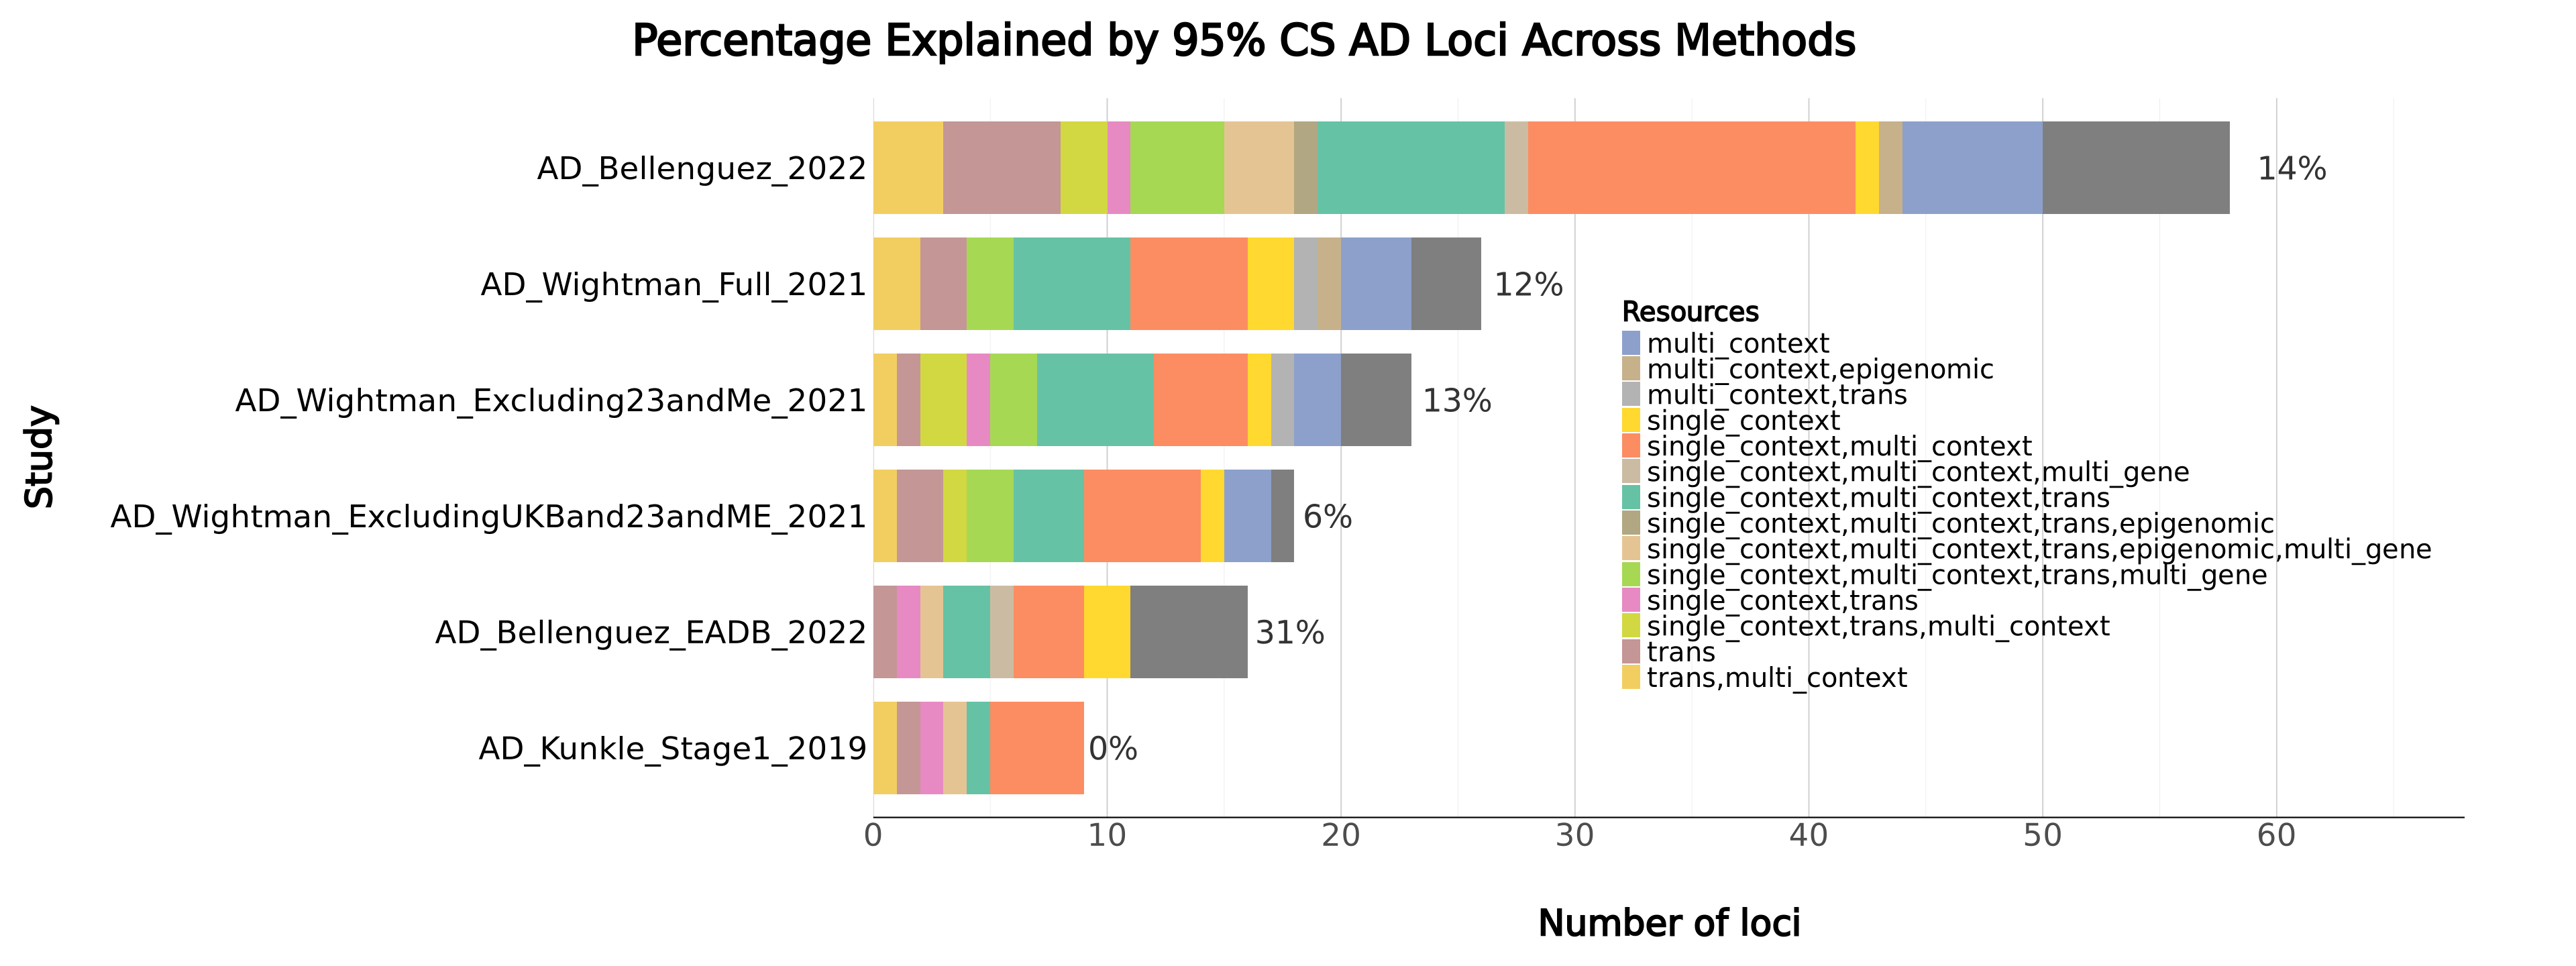

In [164]:
# Aggregate data to count occurrences of each (study, resources) pair
plot_data <- all_95_95_cs_explain %>%
  group_by(study, resources) %>%
  summarise(count = n(), .groups = "drop") %>%
  mutate(resources = ifelse(is.na(resources), 'Not explained', resources)) %>%
  filter(!study %in% c("AD_Jansen_2021", "AD_Bellenguez_EADI_2022"))

# Compute NA percentage per study
study_totals <- plot_data %>%
  group_by(study) %>%
  summarise(total_count = sum(count)) %>%
  left_join(
    plot_data %>% filter(resources == 'Not explained') %>%
      group_by(study) %>%
      summarise(not_explained_count = sum(count), .groups = "drop"),
    by = "study"
  ) %>%
  mutate(
    not_explained_count = replace_na(not_explained_count, 0),
    non_na_percentage = round(1 - not_explained_count / total_count, 2),
    unexplained_percentage = 1 - non_na_percentage  # Calculate unexplained percentage
  ) %>%
  select(study, total_count, non_na_percentage, unexplained_percentage)

# Merge total counts back into plot data
plot_data <- left_join(plot_data, study_totals, by = "study")

# Reorder studies by total count for better visualization
study_order <- study_totals %>% arrange(total_count) %>% pull(study)
plot_data$study <- factor(plot_data$study, levels = study_order)

# Create the horizontal stacked bar plot
options(repr.plot.width = 32, repr.plot.height = 12)  

ggplot(plot_data, aes(x = count, y = study, fill = resources)) +
  geom_bar(stat = "identity", position = "stack", width = 0.8) +
  # Add percentage labels (unexplained %)
  geom_text(data = study_totals, 
            aes(x = total_count * 1.02,  # Position just to the right of the bar
                y = study, 
                label = percent(unexplained_percentage, accuracy = 1)), 
            inherit.aes = FALSE,
            size = 10, color = 'grey20', hjust = 0) +
  theme_minimal() +
  labs(x = "Number of loci", 
       y = "Study", 
       fill = "Resources", 
       title = "Percentage Explained by 95% CS AD Loci Across Methods") +
  theme(
    plot.title = element_text(size = 38, face = "bold", hjust = 0.5, family = "candara", margin = margin(b = 30)),
    plot.title.position = "plot",
    axis.title.x = element_text(size = 32, face = "bold", family = "candara", margin = margin(t = 50)),  # X-axis title: "Number of loci"
    axis.title.y = element_text(size = 32, face = "bold",  family = "candara", margin = margin(r = 50)),  # Y-axis title: "Study"
    axis.text.y = element_text(size = 28, hjust = 1, color = "black"),  # Larger text for study names
    axis.text.x = element_text(size = 28),
    axis.title = element_text(size = 14, face = "bold"),
    legend.text = element_text(size = 24),
    legend.title = element_text(size = 24, face = "bold"),
    axis.line.x = element_line(color = "black", size = 0.6),
    panel.grid.major.y = element_blank(),  # Remove horizontal grid lines
    panel.grid.minor.y = element_blank(),
    panel.grid.major.x = element_line(color = "grey80"),
    panel.background = element_rect(fill = "white", colour = NA),
    plot.background = element_rect(fill = "white", colour = NA),
    legend.position =  c(0.725, 0.45),
    plot.margin = margin(20, 100, 20, 20)  # Add right margin for labels
  ) +
   scale_x_continuous(
    breaks = c(0, 10, 20 , 30, 40, 50, 60),
    expand = expansion(mult = c(0, 0.15)),
    labels = scales::comma
  )  +  # Add space for labels
  scale_fill_manual(values = set2_colors)

# dev.off()

#### check trans only

In [61]:
trans_only_gwas_cs <- all_95_95_cs %>% filter(resources == 'trans') %>% left_join(all_95_95)

Joining with `by = join_by(gwas_cs)`


In [59]:
single_95_n_var  = single_95_info %>% pull(variant_ID) %>% unique %>% length
single_95_n_cs = single_95_info %>% pull(cs_id) %>% unique %>% length

trans_95_raw_n_var  = trans_95_info_raw %>% pull(variant_ID) %>% unique %>% length
trans_95_raw_n_cs = trans_95_info_raw %>% pull(cs_id) %>% unique %>% length

trans_95_n_var  = trans_95_info %>% pull(variant_ID) %>% unique %>% length
trans_95_n_cs = trans_95_info %>% pull(cs_id) %>% unique %>% length

single_95_n_gwas_cs <- all_95_95_cs %>% filter(str_detect(resources, 'single')) %>% pull(gwas_cs) %>% length
trans_95_n_gwas_cs <- all_95_95_cs %>% filter(str_detect(resources, 'trans')) %>% pull(gwas_cs) %>% length

single_95_n_bellenuez_gwas_cs <- all_95_95_cs %>% filter(str_detect(resources, 'single'), str_detect(gwas_cs, 'AD_Bellenguez_2022')) %>% pull(gwas_cs) %>% length
trans_95_n_bellenuez_gwas_cs <- all_95_95_cs %>% filter(str_detect(resources, 'trans'), str_detect(gwas_cs, 'AD_Bellenguez_2022')) %>% pull(gwas_cs) %>% length

#### add gene information to gpQTL

In [62]:
trans_only_gwas_cs_gp <- trans_only_gwas_cs %>% filter(str_detect(event_ID, 'gpQTL')) %>% mutate(gpID = str_extract(event_ID, 'gp_.+'))

In [63]:
trans_only_gwas_cs_gp 

gwas_cs,resources,variant_ID,#chr,start,end,a1,a2,gene_ID,event_ID,variant_id,z,pip,study,region,resource,gpID
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
AD_Kunkle_Stage1_2019:chr16_78676505_80260790:1,trans,chr16:79321960:G:A,16,79321959,79321960,A,G,chr16_78676505_80260790,ROSMAP_gpQTL_gp_3231,16:79321960:G:A,NA,0.9771629,AD_Kunkle_Stage1_2019,chr16_78676505_80260790,trans,gp_3231
AD_Wightman_Full_2021:chr8_26225312_27515963:2,trans,chr8:27462330:A:T,8,27462329,27462330,T,A,chr8_26225312_27515963,ROSMAP_gpQTL_gp_7827,8:27462330:A:T,NA,0.3067440,AD_Wightman_Full_2021,chr8_26225312_27515963,trans,gp_7827
AD_Wightman_Full_2021:chr8_26225312_27515963:2,trans,chr8:27465457:G:A,8,27465456,27465457,A,G,chr8_26225312_27515963,ROSMAP_gpQTL_gp_7827,8:27465457:G:A,NA,0.3913480,AD_Wightman_Full_2021,chr8_26225312_27515963,trans,gp_7827


In [67]:
unadj_gpQTL_phenoID <- fread('/data/gpQTL/unadjusted/analysis_ready/phenotype_preprocessing_v202505/ROSMAP_glycoprotein_unadjusted_PhenotypeID.txt') #not on synapse but it's in github StatFunGen/xqtl-resources/data/ROSMAP
adj_gpQTL_phenoID <- fread('/data/gpQTL/adjusted/analysis_ready/phenotype_preprocessing_v202505/ROSMAP_glycoprotein_adjusted_PhenotypeID.txt') #not on synapse but it's in github StatFunGen/xqtl-resources/data/ROSMAP
gpQTL_phenoID <- rbind(unadj_gpQTL_phenoID, adj_gpQTL_phenoID) %>% distinct
colnames(gpQTL_phenoID) <- c('gpID', 'gene_id')

In [68]:
trans_only_gwas_cs_gp <- trans_only_gwas_cs_gp %>% merge(., gpQTL_phenoID)

trans_only_gwas_cs_gp <- trans_only_gwas_cs_gp %>% mutate(event_ID = paste0(str_remove(event_ID, 'gp_.+'),  gene_id))

In [69]:
trans_only_gwas_cs <- rbind( trans_only_gwas_cs %>% filter(!str_detect(event_ID, 'gpQTL')), trans_only_gwas_cs_gp %>% select(-gpID, -gene_id))

In [70]:
trans_only_gwas_cs_sum <- trans_only_gwas_cs %>% group_by(region) %>% summarise(n_event = n_distinct(event_ID), events = paste(unique(event_ID), collapse = ','), studies = paste(unique(study), collapse = ','))

# trans_only_gwas_cs_sum %>% saveRDS('trans_only.loci.info.rds')
trans_only_gwas_cs_sum

region,n_event,events,studies
<chr>,<int>,<chr>,<chr>
chr11_119829118_122612025,1,MSBB_eQTL_BM10_ENSG00000198380,"AD_Bellenguez_2022,AD_Wightman_Excluding23andMe_2021,AD_Wightman_ExcludingUKBand23andME_2021,AD_Wightman_Full_2021"
chr15_47690138_49901356,1,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,AD_Bellenguez_2022
chr15_49901356_51733753,1,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000087263,AD_Bellenguez_2022
chr16_78676505_80260790,2,"ROSMAP_pQTL_ENSG00000120697,ROSMAP_gpQTL_ENSG00000106809","AD_Wightman_ExcludingUKBand23andME_2021,AD_Kunkle_Stage1_2019"
chr1_158933969_162352348,1,ROSMAP_DeJager_eQTL_AC_ENSG00000237637,AD_Jansen_2021
chr20_40697409_42726168,1,ROSMAP_DeJager_eQTL_OPC_ENSG00000114861,AD_Bellenguez_EADB_2022
chr2_125689597_127728648,1,MSBB_eQTL_BM10_ENSG00000168077,AD_Bellenguez_2022
chr2_158720603_160577800,2,"MSBB_eQTL_BM10_ENSG00000213579,ROSMAP_DeJager_eQTL_Monocyte_ENSG00000105220",AD_Bellenguez_2022
chr8_26225312_27515963,3,"MSBB_eQTL_BM22_ENSG00000137270,MSBB_eQTL_BM36_ENSG00000140987,ROSMAP_gpQTL_ENSG00000113621",AD_Wightman_Full_2021


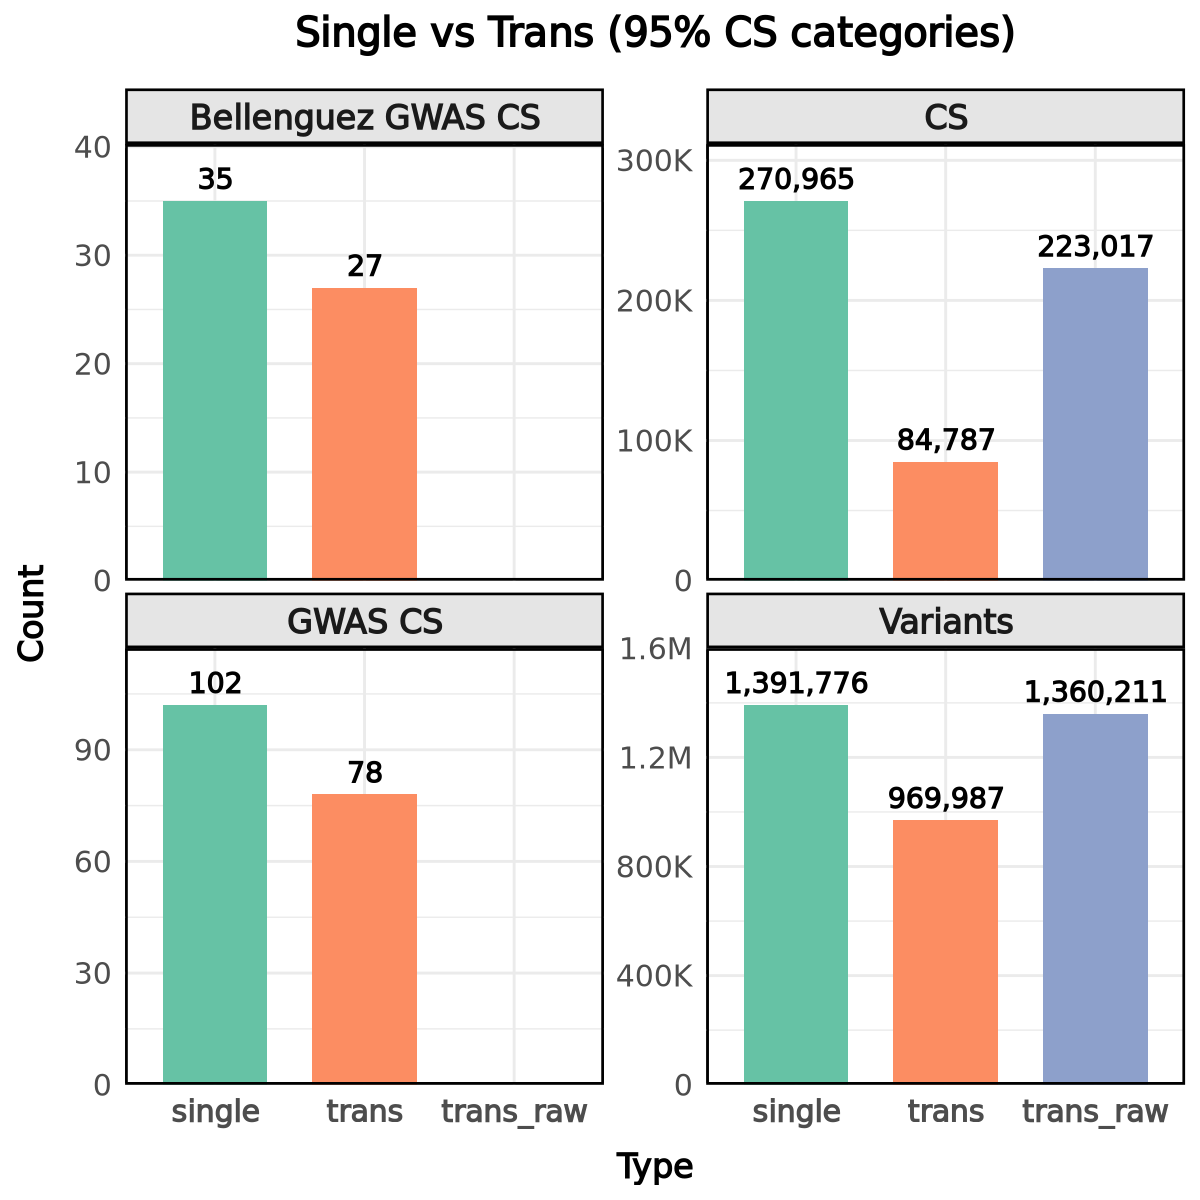

In [215]:
options(repr.plot.width = 10, repr.plot.height = 10)  

# Custom formatting function for y-axis only
format_axis_count <- function(x) {
  case_when(
    x >= 1000000 ~ paste0(round(x/1000000, 1), "M"),
    x >= 1000 ~ paste0(round(x/1000, 1), "K"),
    TRUE ~ as.character(x)
  )
}

ggplot(summary_df, aes(x = type, y = value, fill = type)) +
  geom_col(position = position_dodge(width = 0.9), width = 0.7) +
  geom_text(aes(label = scales::comma(value)),
            position = position_dodge(width = 0.9),
            vjust = -0.5,
            size = 6, fontface = "bold", show.legend = FALSE) +
  facet_wrap(~ category, scales = "free_y", ncol = 2) +
  scale_y_continuous(
    expand = expansion(mult = c(0, 0.15)),
    labels = format_axis_count
  ) +
  theme_minimal(base_size = 18) +  # Use theme_minimal instead of theme_classic
  labs(x = "Type", y = "Count",
       title = "Single vs Trans (95% CS categories)") +
    theme(
    plot.title = element_text(size = 24, face = "bold", hjust = 0.5, margin = margin(b = 20)),
    axis.title.x = element_text(size = 20, face = "bold", margin = margin(t = 15)),
    axis.title.y = element_text(size = 20, face = "bold", margin = margin(r = 15)),
    axis.text.x = element_text(size = 18, face = "bold"),
    axis.text.y = element_text(size = 18),
    strip.text = element_text(size = 20, face = "bold"),
    legend.position = "none",
    panel.spacing = unit(0.5, "lines"),
    # Classic theme with balanced borders
    panel.border = element_rect(color = "black", fill = NA, size = 1.5),  # Consistent border size
    strip.background = element_rect(fill = "grey90", color = "black", size = 1.5),
    panel.background = element_rect(fill = "white")
  ) +
  scale_fill_brewer(palette = "Set2")